### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose

### Sample dataset

In [2]:
data = {
    'Size_sqft': [850, 900, 1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000],
    'Rooms': [2, 2, 3, 3, 4, 4, 4, 5, 5, 5],
    'Location': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'Price': [200000, 210000, 250000, 280000, 300000, 320000, 340000, 370000, 400000, 420000],
    'Sale_Date': pd.date_range(start='2023-01-01', periods=10, freq='M')
}

df = pd.DataFrame(data)
print(df)

   Size_sqft  Rooms Location   Price  Sale_Date
0        850      2        A  200000 2023-01-31
1        900      2        B  210000 2023-02-28
2       1200      3        A  250000 2023-03-31
3       1500      3        B  280000 2023-04-30
4       1800      4        A  300000 2023-05-31
5       2000      4        B  320000 2023-06-30
6       2200      4        A  340000 2023-07-31
7       2500      5        B  370000 2023-08-31
8       2800      5        A  400000 2023-09-30
9       3000      5        B  420000 2023-10-31


C:\Users\priya\AppData\Local\Temp\ipykernel_14280\713296386.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Sale_Date': pd.date_range(start='2023-01-01', periods=10, freq='M')


### Data Preprocessing

In [3]:
# Encode categorical variable
le = LabelEncoder()
df['Location_Code'] = le.fit_transform(df['Location'])

# Features and target
X = df[['Size_sqft', 'Rooms', 'Location_Code']]
y = df['Price']

###  Scatter plot: Size vs Price

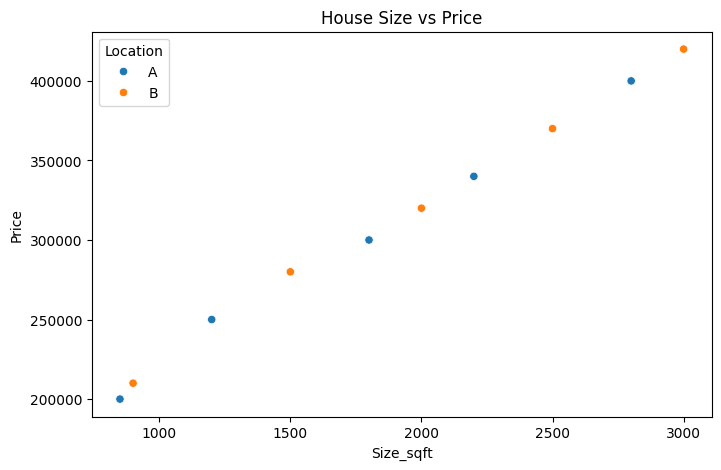

In [4]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size_sqft', y='Price', data=df, hue='Location')
plt.title('House Size vs Price')
plt.show()

### Regression plot

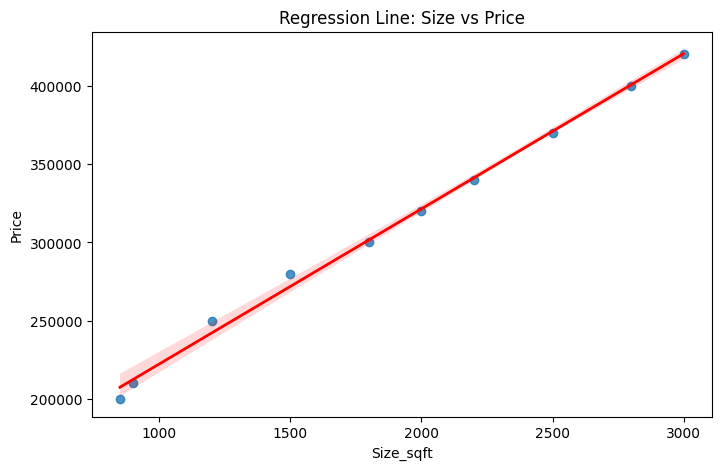

In [5]:
plt.figure(figsize=(8,5))
sns.regplot(x='Size_sqft', y='Price', data=df, line_kws={'color':'red', 'linewidth':2})
plt.title('Regression Line: Size vs Price')
plt.show()

### Residual plot

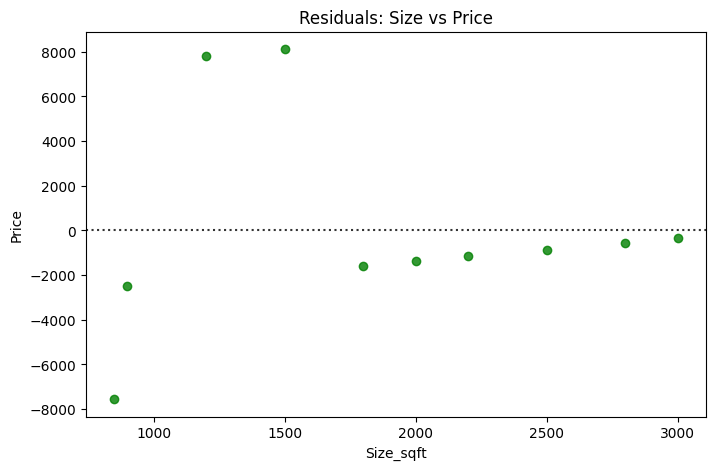

In [6]:
plt.figure(figsize=(8,5))
sns.residplot(x='Size_sqft', y='Price', data=df, color='green')
plt.title('Residuals: Size vs Price')
plt.show()

### Fit linear regression model

In [7]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluate model

In [8]:
y_pred = model.predict(X)
print("R-squared:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))

R-squared: 0.996469294386827
Mean Squared Error: 18179603.202227686


### Predict house prices for new sizes

In [9]:
new_houses = pd.DataFrame({
    'Size_sqft': [1600, 2100, 2700],
    'Rooms': [3, 4, 5],
    'Location_Code': le.transform(['A', 'B', 'A'])
})
predicted_prices = model.predict(new_houses)
print("Predicted Prices:", predicted_prices)

Predicted Prices: [279765.05395057 331950.92238079 390001.74034111]


### Visualize actual vs predicted

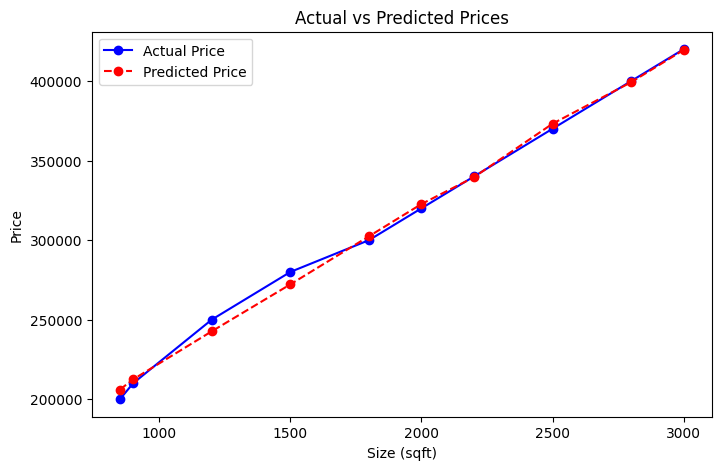

In [10]:
plt.figure(figsize=(8,5))
plt.plot(df['Size_sqft'], y, 'bo-', label='Actual Price')
plt.plot(df['Size_sqft'], y_pred, 'ro--', label='Predicted Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

### Time series plot of prices

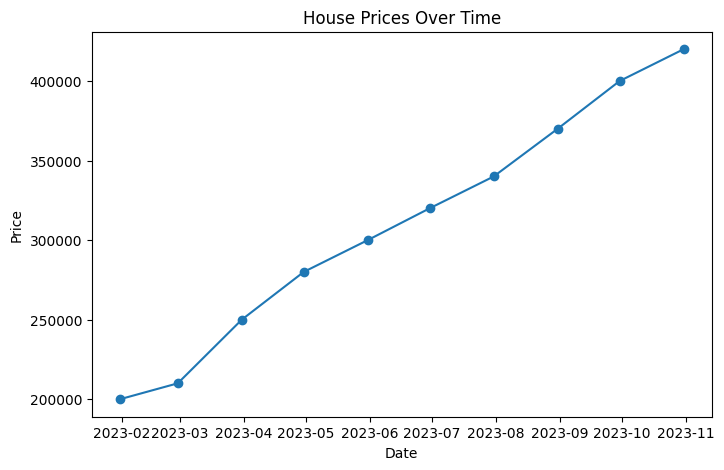

In [11]:
plt.figure(figsize=(8,5))
plt.plot(df['Sale_Date'], df['Price'], marker='o')
plt.title('House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Seasonal decomposition

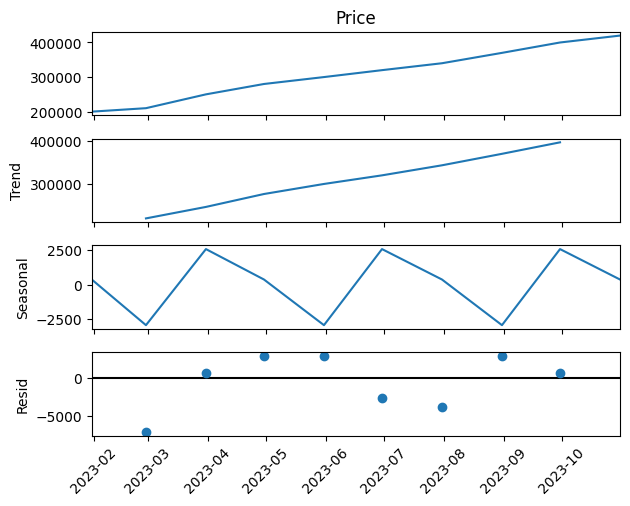

In [13]:
df_ts = df.set_index('Sale_Date')
decomposition = seasonal_decompose(df_ts['Price'], model='additive', period=3)
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

### Forecast future prices (simple linear trend)

In [14]:
future_dates = pd.date_range(start='2023-11-30', periods=3, freq='M')
future_sizes = pd.DataFrame({'Size_sqft':[2300, 2600, 2900], 'Rooms':[4,5,5], 'Location_Code':[0,1,0]})
future_prices = model.predict(future_sizes)
forecast = pd.DataFrame({'Date': future_dates, 'Forecast_Price': future_prices})
print(forecast)

        Date  Forecast_Price
0 2023-11-30   348792.203272
1 2023-12-31   382432.996867
2 2024-01-31   408546.815176


C:\Users\priya\AppData\Local\Temp\ipykernel_14280\1496085023.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2023-11-30', periods=3, freq='M')
